In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* CustomerID - Unique id to identify a customer.
* Gender - Gender of the customer
* Age - Age of the customer
* Annual Income (k$) - Annual income of the customer in USD.
* Spending Score (1-100) - A score given to the customer by the store on the basis of amount they spent on buying products.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Categorical feature -
* Gender

Numerical features -
* CustomerID
* Age
* Annual Income (k$)
* Spending Score

In [6]:
# Checking for missing value in each column

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* There is no missing value in the dataset.

In [7]:
# Getting the statistics of numerical features

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data analysis and visualization

In [8]:
# Setting the theme for the plot

sns.set()

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


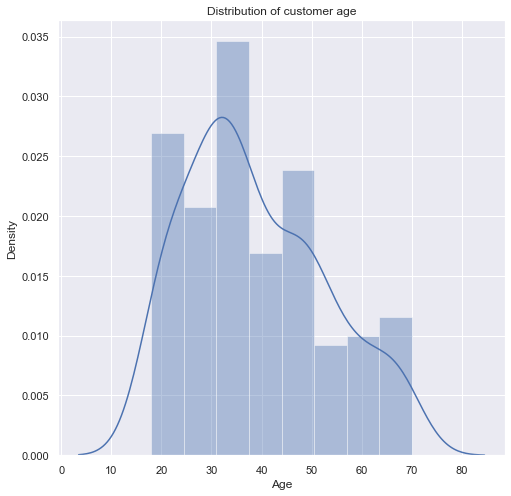

In [9]:
# Distribution of 'Age'

plt.figure(figsize = (8, 8))
sns.distplot(df['Age'])
plt.title('Distribution of customer age')
plt.show()

* Most of the customers lie within the range of `32 - 36 years` age. 

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


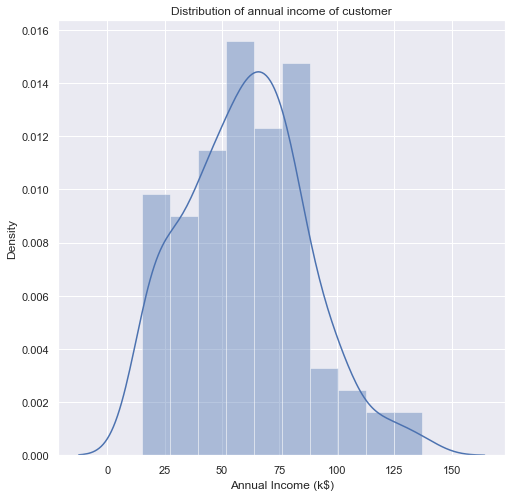

In [10]:
# Distribution of 'Annual Income (k$)'

plt.figure(figsize = (8, 8))
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of annual income of customer')
plt.show()

* Most of the customers are having an annual income ranging b/w `$50k - 75k`

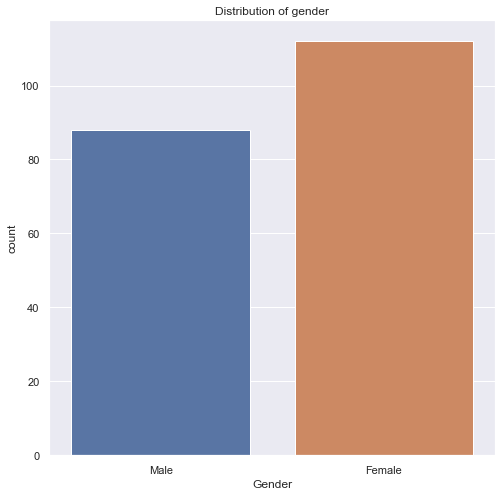

In [11]:
# Distribution of 'Gender'

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Gender')
plt.title('Distribution of gender')
plt.show()

* More `female customers` visit the store than male customers.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


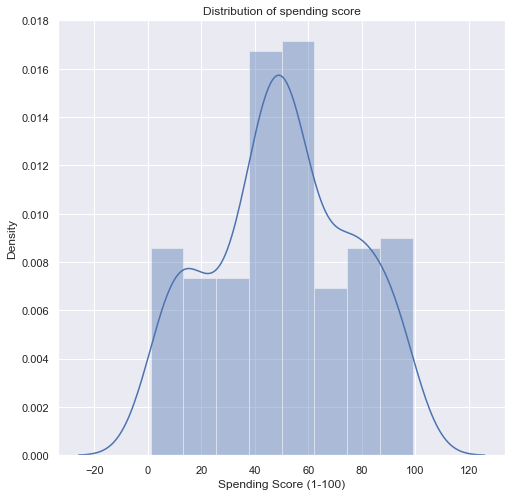

In [12]:
# Distribution of 'Spending score (1-100)'

plt.figure(figsize = (8, 8))
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of spending score')
plt.show()

* In a range of 1 - 100, most customers has a spending score between `48 - 62`.
* Customers like to spend more money in the store.

# Using K-Mean clustering

* Because we want to target customers based on their income, we will only consider two columns - `Annual Income (k$)` and `Spending Score (1-100)`

In [13]:
# Getting the values for plotting 

f1 = df['Annual Income (k$)'].values
f2 = df['Spending Score (1-100)'].values

In [14]:
f1

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [15]:
f2

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [16]:
# Mapping value of annual income with corresponding spending score in an array and converting them to list

comb = np.array(list(zip(f1, f2)))

In [17]:
comb

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

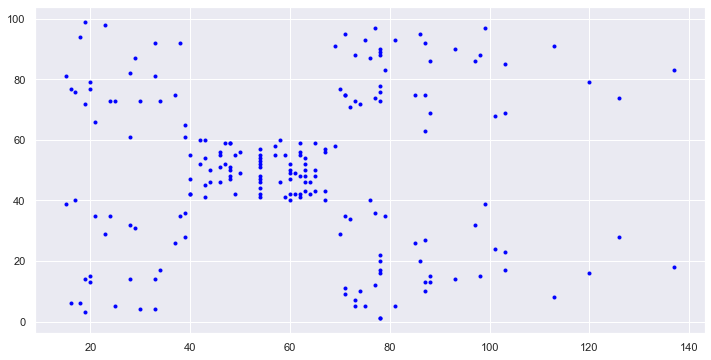

In [18]:
# Getting a scatter plot

plt.rcParams['figure.figsize'] = (12, 6)
plt.scatter(f1, f2, c = 'blue', s = 9) # s is used to set the thickness of datapoints on the plot

* From the plot, we can see the existence of `5 different clusters`.

### Checking for optimal number of clusters

In [19]:
from sklearn.cluster import KMeans

cluster_range = range(1, 15)
cluster_error = []
for i in cluster_range:
    clus = KMeans(i, n_init = 5) # Cluster will change its centroid '5 times' with n_init = 5
    clus.fit(comb)
    label = clus.labels_ # To get the cluster labels
    centroid = clus.cluster_centers_ # To get the centroid of cluster
    cluster_error.append(clus.inertia_) # To store the error in the list    

In [20]:
# Creating a new dataframe with range and error

new_df = pd.DataFrame({'Number of cluster':cluster_range, 'Cluster error':cluster_error})

In [21]:
# Displaying all the values in the dataframe

new_df[0:15]

,Number of cluster,Cluster error
0,1,269981.280000
1,2,183257.861545
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37239.835542
6,7,30259.657207
7,8,25388.760028
8,9,21818.114588
9,10,19646.482019


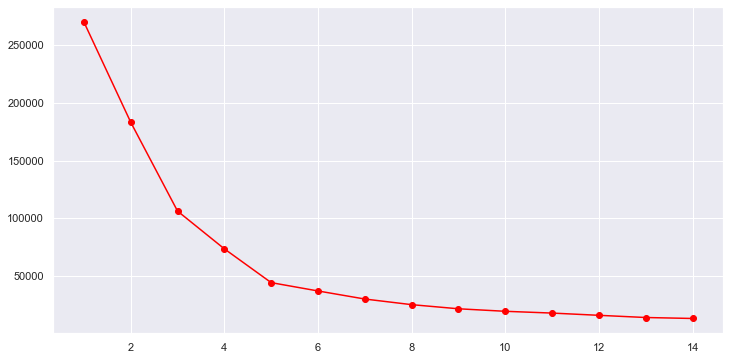

In [22]:
# Elbow plot to get the optimal number of clusters

plt.figure(figsize = (12, 6))
plt.plot(new_df['Number of cluster'], new_df['Cluster error'], marker = 'o', c = 'red')

From the elbow plot -
* The slope decreased uniformly till 4 and again from 4 to 5.
* The slope changed drastically agter 5.
* Hence, optimal number of cluster = `5`

### Making the model

In [23]:
km = KMeans(n_clusters = 5)
km = km.fit(comb)

# Getting the cluster label
pred = km.predict(comb)

# Getting the centroids
center = km.cluster_centers_

In [24]:
# Creating a new dataframe using the previous dataframe along with predicted label

col = ['col1', 'col2']
predict_df = pd.DataFrame(comb, columns = col)
predict_df['Prediction'] = pred

In [25]:
predict_df.head(10)

,col1,col2,Prediction
0,15,39,1
1,15,81,0
2,16,6,1
3,16,77,0
4,17,40,1
5,17,76,0
6,18,6,1
7,18,94,0
8,19,3,1
9,19,72,0


In [26]:
predict_df.tail(10)

,col1,col2,Prediction
190,103,23,4
191,103,69,2
192,113,8,4
193,113,91,2
194,120,16,4
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4
199,137,83,2


In [27]:
# Getting the total values present in each label

predict_df['Prediction'].value_counts()

3    81
2    39
4    35
1    23
0    22
Name: Prediction, dtype: int64

### Plotting the clusters

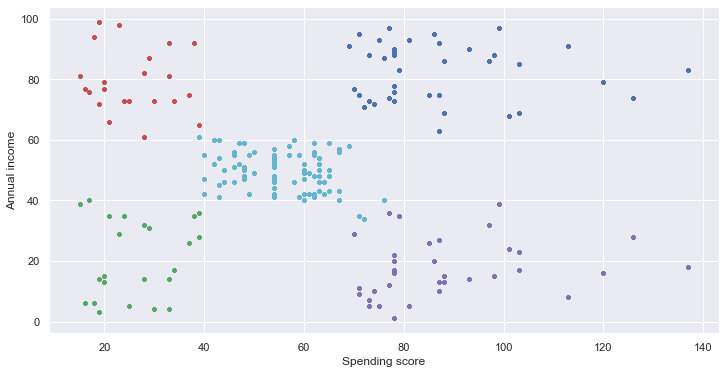

In [32]:
color = ['r', 'g', 'b', 'c', 'm', 'y']
fig, ax = plt.subplots()
plt.xlabel('Spending score')
plt.ylabel('Annual income')
c = np.array([3, 3])
for j in pred:
    point = np.array(predict_df.loc[predict_df['Prediction'] == j])
    ax.scatter(point[:, 0], point[:, 1], s = 7, c = color[j])

On the basis of spending score and annual income, the plot is divided into 4 categories -
1. People with low income and low spending score
2. People with low income and high spending score
3. People with high income and low spending score
4. People with high income and high spending score

We may also have another group of people with intermediate income and intermediate spending score.

From the scatter plot -
* We can see 5 different clusters based on spending score and annual income.
* We may now target people with `high annual income and low spending score`.
* We may also target people with `low annual income and low spending score`.
* `Offers and discounts` may help in increasing their spending score.